## AI Usage

This Notebook answeres the question:

How does the usage of AI tools correlate with developers' concerns about AI's ethical implications and potential threats?

- Import Libraries: Start by importing libraries you'll need for data manipulation, analysis, and visualization.
- Load Data (Optional): If the data is stored in the "data" folder, use appropriate functions to load it into the notebook environment.
- Data Understanding: Briefly describe the data, including column names and data types.
- Data Preparation: This will involve handling missing values, converting data types if needed, and cleaning any inconsistencies.
- Exploratory Data Analysis (EDA): Perform relevant Exploratory Data Analysis (EDA) techniques like descriptive statistics, visualizations (histograms, scatter plots) to understand the distribution of variables and relationships between them.
- Modeling (Optional): Depending on the question, you might choose to use statistical tests, correlations, or even simple machine learning models (e.g., linear regression). Clearly explain the chosen approach and why it's suitable.
- Visualization: Create clear and impactful visualizations to communicate your findings visually (bar charts, line graphs, heatmaps).
- Results and Conclusion: Summarize your key findings related to the specific business question being addressed in the notebook. Tie back these findings to the initial question and the data you analyzed.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


df_schema= pd.read_csv('../data/raw/stack-overflow-developer-survey-2024/survey_results_schema.csv')
df_public = pd.read_csv('../data/raw/stack-overflow-developer-survey-2024/survey_results_public.csv')

df_schema.head()

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR


In [2]:
df_public.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
df_public.columns.values.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

## Data Understanding

First of all, we should determine which data to use to answer the question. We need to know if the developers are using any AI tools at all, so we require the data from AISelect. Additionally, we should examine which part of their project they are using AI in and how highly they rate the accountability of such tools. Therefore, we need AIAcc and AIChallenges. It is possible that the importance of ethical responsibilities correlates with their concerns about AI being a threat to their current job. Thus, we also need AIThreat and AIEthics.

In [4]:
# let's create the dataframe we need from df_public
df_q2 = df_public[[ 'AISelect', 'AIAcc', 'AIChallenges', 'AIEthics', 'AIThreat']].copy()

df_q2.head()

,AISelect,AIAcc,AIChallenges,AIEthics,AIThreat
0,Yes,NaN,NaN,NaN,NaN
1,"No, and I don't plan to",NaN,NaN,NaN,NaN
2,"No, and I don't plan to",NaN,NaN,NaN,NaN
3,Yes,Somewhat trust,Don’t trust the output or answers,Circulating misinformation or disinformation;M...,No
4,"No, and I don't plan to",NaN,NaN,NaN,NaN


In [5]:
df_q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AISelect      60907 non-null  object
 1   AIAcc         37302 non-null  object
 2   AIChallenges  37531 non-null  object
 3   AIEthics      41548 non-null  object
 4   AIThreat      44689 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


## Data Preparation

Since AISelect is the target variable, we should drop all rows where it contains a NaN value. In these cases, it would be impossible to determine whether the participant uses an AI tool, plans to use one, or does not want to use one.
It is also crucial to know whether they see AI as a threat to their job. Therefore, NaN values in the AIThreat column should be dropped as well.
For the other columns, we can fill NaN values with "unknown," as these do not have a significant impact on determining whether developers perceive AI as a potential threat.

In [6]:
# Drop rows where all relevant columns are NaN
df_q2 = df_q2.dropna(subset=['AISelect','AIThreat'])

for column in ['AIAcc', 'AIChallenges', 'AIEthics']:
    df_q2[column] = df_q2[column].fillna('Unknown')  # Replace NaN with a placeholder = Unknown

In [7]:
df_q2.head()

,AISelect,AIAcc,AIChallenges,AIEthics,AIThreat
3,Yes,Somewhat trust,Don’t trust the output or answers,Circulating misinformation or disinformation;M...,No
5,Yes,Somewhat trust,Unknown,Circulating misinformation or disinformation;M...,No
7,Yes,Somewhat distrust,Don’t trust the output or answers;AI tools lac...,Circulating misinformation or disinformation;M...,Yes
9,Yes,Neither trust nor distrust,Unknown,Unknown,I'm not sure
10,Yes,Somewhat distrust,Don’t trust the output or answers;AI tools lac...,Circulating misinformation or disinformation;M...,No


In [8]:
df_q2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 3 to 65432
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AISelect      44689 non-null  object
 1   AIAcc         44689 non-null  object
 2   AIChallenges  44689 non-null  object
 3   AIEthics      44689 non-null  object
 4   AIThreat      44689 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


As we can see there are no NaN values anymore. The next step is to encode the categorical variables into numerical so it is possible to train machine learning models. So we should use:

- `Ordinal Encoding` for AISelect: Convert the AISelect column to ordinal values 
- `Categorical Encoding` for AIAcc, AIChallenges, AIEthics, and AIThreat: Convert these columns into numerical values or dummy variables if they have multiple categories.


In [9]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'AISelect' column
df_q2['AISelect'] = df_q2['AISelect'].map({'Yes': 1, 'No, and I don\'t plan to': 0, 'No, but I plan to soon': 2})

# Encoding 'AIAcc', 'AIChallenges', 'AIEthics', and 'AIThreat' columns
label_encoders = {}
for column in ['AIAcc', 'AIChallenges', 'AIEthics', 'AIThreat']:
    le = LabelEncoder()
    df_q2[column] = df_q2[column].fillna('Unknown')  # Replace NaN with a placeholder
    df_q2[column] = le.fit_transform(df_q2[column])
    label_encoders[column] = le


In [10]:
df_q2.head()

,AISelect,AIAcc,AIChallenges,AIEthics,AIThreat
3,1,4,57,23,1
5,1,4,228,39,1
7,1,3,58,39,2
9,1,2,228,126,0
10,1,3,72,44,1


In [11]:
df_q2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 3 to 65432
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AISelect      44689 non-null  int64
 1   AIAcc         44689 non-null  int32
 2   AIChallenges  44689 non-null  int32
 3   AIEthics      44689 non-null  int32
 4   AIThreat      44689 non-null  int32
dtypes: int32(4), int64(1)
memory usage: 1.4 MB


After that we should normalize the data.

In [13]:
# Standardize the features
scaler = StandardScaler()
df_q2_scaled = scaler.fit_transform(df_q2)



Now lets try to apply k-means clustering. therefore we must determine the optimal number of clusters with the elbow method.

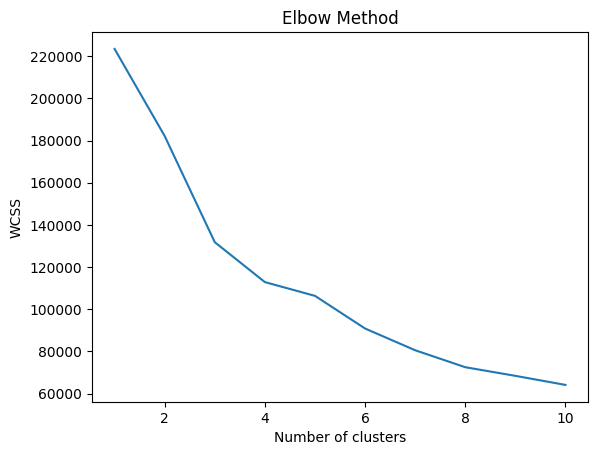

In [14]:
from sklearn.cluster import KMeans

wcss = []

# Try clustering for a range of cluster numbers (e.g., 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_q2_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



Lets say the optimal number for clusters is 3.

In [15]:
# Set the number of clusters based on the elbow plot (3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the K-Means model to your scaled data
kmeans.fit(df_q2_scaled)

# Add the cluster labels to your original DataFrame (optional)
df_q2['Cluster'] = kmeans.labels_

# View the DataFrame with the new 'Cluster' column
print(df_q2.head())

    AISelect  AIAcc  AIChallenges  AIEthics  AIThreat  Cluster
3          1      4            57        23         1        0
5          1      4           228        39         1        2
7          1      3            58        39         2        0
9          1      2           228       126         0        2
10         1      3            72        44         1        0


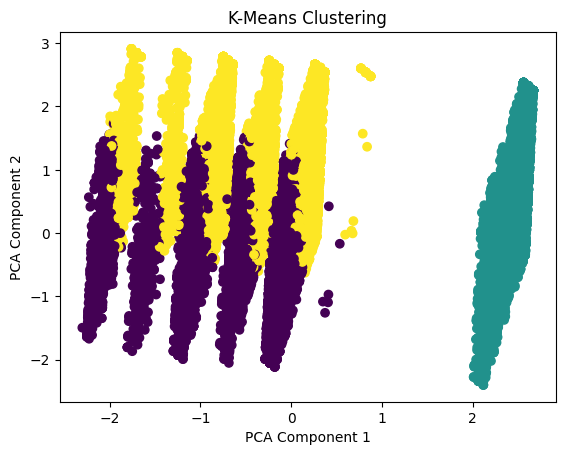

In [16]:
from sklearn.decomposition import PCA

# Reduce the dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_q2_scaled)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [17]:
# Group by cluster to analyze the characteristics of each cluster
cluster_summary = df_q2.groupby('Cluster').mean()
print(cluster_summary)

         AISelect     AIAcc  AIChallenges   AIEthics  AIThreat
Cluster                                                       
0             1.0  2.782458     64.949599  42.131585  0.926917
1             2.0  5.000000    130.133118  46.603995  0.908384
2             1.0  2.952783    202.795197  57.435624  0.921800
